In [331]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [192]:
#data wrangling / cleaning

In [252]:
oil = pd.read_csv("oil_price.csv")
fao = pd.read_csv("food_index.csv")

In [253]:
fao.columns = fao.iloc[0,:]
fao = fao.iloc[1::, 0:7]

In [254]:
fao["Date"] = fao["Date"].astype('string')

In [255]:
fao["Year"] = fao["Date"].str[:4]
fao["Month"] = fao["Date"].str[5:]

In [256]:
fao["Year"] = fao["Year"].astype("int")
fao["Month"] = fao["Month"].astype("int")

In [257]:
fao = fao.loc[:,["Food Price Index", "Year", "Month"]]

In [258]:
fao["Food Price Index"] = fao["Food Price Index"].astype("float")

In [259]:
oil["Date"] = oil["Date"].astype('string')

In [260]:
oil["Year"] = oil['Date'].str[0:4]
oil["Month"] = oil['Date'].str[5:7]
oil["Day"] = oil['Date'].str[8:10]

In [261]:
oil["Year"] = oil["Year"].astype("int")
oil["Month"] = oil["Month"].astype("int")
oil["Day"] = oil["Day"].astype("int")

In [262]:
oil["Price"] = (oil["Open"] + oil["Close"])/2

In [263]:
oil = oil.loc[:, ["Symbol", "Price", "Year", "Month", "Day"]]

In [264]:
oil = oil.groupby(["Symbol", "Year", "Month"]).median()[["Price"]]

In [265]:
oil.reset_index(inplace = True)

In [292]:
gas = oil[oil["Symbol"] == "Natural Gas"]
crude = oil[oil["Symbol"] == "Brent Oil"]

In [293]:
df = pd.merge(crude, fao, how = "inner", on = ["Year", "Month"])

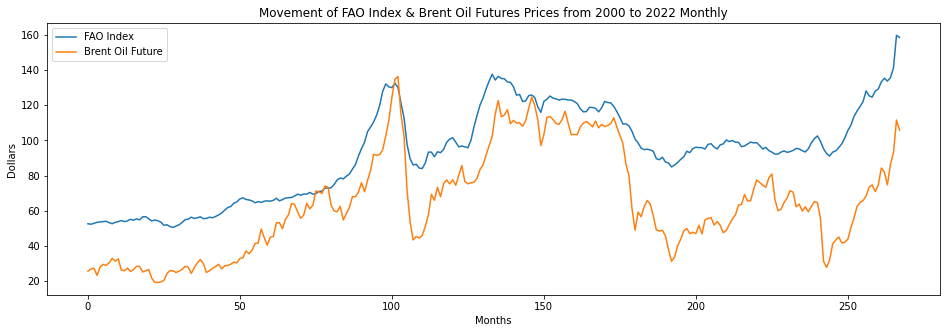

In [296]:
plt.rcParams["figure.figsize"] = (16,5)
plt.plot(df.index, df["Food Price Index"])
plt.plot(df.index, df["Price"])
plt.xlabel("Months")
plt.ylabel("Dollars")
plt.title("Movement of FAO Index & Brent Oil Futures Prices from 2000 to 2022 Monthly")
plt.legend(["FAO Index", "Brent Oil Future"])
plt.show()

In [469]:
X = df.loc[:, ["Price", "Year", "Month"]]
X = sm.add_constant(X)
y = df.loc[:, ["Food Price Index"]]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/Users/bennysun/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Food Price Index   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     786.4
Date:                Sat, 02 Jul 2022   Prob (F-statistic):          2.89e-131
Time:                        17:29:42   Log-Likelihood:                -945.73
No. Observations:                 268   AIC:                             1899.
Df Residuals:                     264   BIC:                             1914.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3415.1913    171.055    -19.965      0.000   -3751.998   -3078.385
Price          0.6220      0.019     33.004      0.000       0.585       0.659
Year           1.7244      0.085     20.219      0.000       1.557       1.892
Month          0.0620      0.147      0.423      0.673      -0.227       0.351
==============================================================================
Omnibus:                        0.838   Durbin-Watson:                   0.145
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.562
Skew:                           0.020   Prob(JB):                        0.755
Kurtosis:                       3.221   Cond. No.                     6.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [489]:
def project_food(price, year, month):
    return -3400 + 0.62 * (price) + 1.724 * year + 0.062 * month

In [490]:
project_food(140.5, 2023, 3)

174.94800000000018

In [468]:
fao

,Food Price Index,Year,Month
1,64.1,1990,1
2,64.5,1990,2
3,63.8,1990,3
4,65.8,1990,4
5,64.4,1990,5
...,...,...,...
384,133.7,2021,12
385,135.6,2022,1
386,141.1,2022,2
387,159.7,2022,3


In [289]:
df = pd.merge(gas, fao, how = "inner", on = ["Year", "Month"])

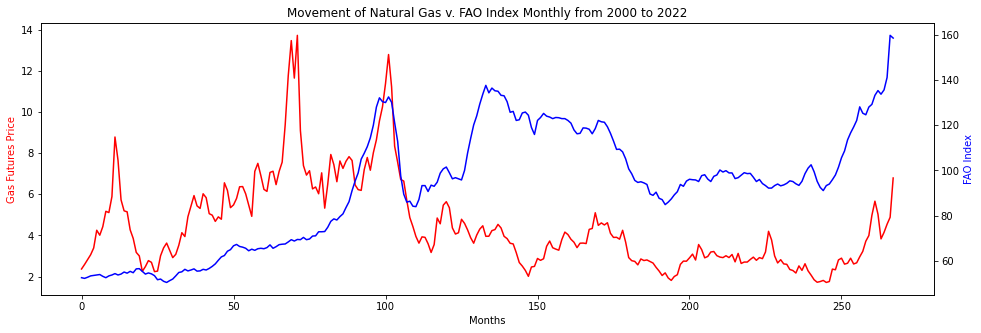

In [290]:
fig, ax1 = plt.subplots() 
ax1.set_xlabel('Months') 
ax1.set_ylabel('Gas Futures Price', color = 'red') 
ax1.plot(df.index, df["Price"], color = 'red') 
ax2 = ax1.twinx() 
ax2.set_ylabel('FAO Index', color = 'blue') 
ax2.plot(df.index, df["Food Price Index"], color = 'blue') 
plt.title("Movement of Natural Gas v. FAO Index Monthly from 2000 to 2022")
plt.show()

In [291]:
X = df.loc[:, ["Price", "Year", "Month"]]
X = sm.add_constant(X)
y = df.loc[:, ["Food Price Index"]]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/Users/bennysun/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Food Price Index   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     102.1
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           6.63e-44
Time:                        15:46:01   Log-Likelihood:                -1150.2
No. Observations:                 268   AIC:                             2308.
Df Residuals:                     264   BIC:                             2323.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6548.6713    385.111    -17.005      0.000   -7306.951   -5790.392
Price          3.1064      0.565      5.500      0.000       1.994       4.219
Year           3.2960      0.191     17.262      0.000       2.920       3.672
Month          0.0482      0.315      0.153      0.878      -0.572       0.668
==============================================================================
Omnibus:                       24.842   Durbin-Watson:                   0.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.697
Skew:                           0.779   Prob(JB):                     5.87e-07
Kurtosis:                       2.620   Cond. No.                     7.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [313]:
x = np.arange(0, 9, 0.1)
y = 5.5 * x**0.75 + 112

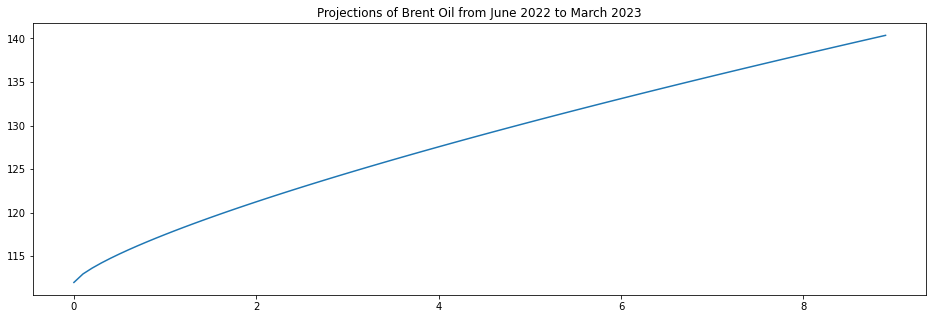

In [320]:
plt.plot(x, y)
plt.title("Projections of Brent Oil from June 2022 to March 2023")
plt.show()

In [392]:
food = pd.read_csv("market_food.csv",  engine='python', encoding="ISO-8859-1")

In [438]:
ref = pd.read_csv("refugees.csv")

/Users/bennysun/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [439]:
ref = ref[ref["Value"] != "*"]

In [440]:
ref["Value"] = ref["Value"].astype(int)

In [441]:
ref = ref.groupby(["Year", "Month"]).sum().reset_index()

In [442]:
obj = ["January", "Februrary", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
date = pd.DataFrame(obj, index = np.arange(1, 13, 1))
date["Month"] = date.index

In [443]:
ref = ref.rename(columns = {"Month":0})

In [444]:
ref = pd.merge(ref, date, on = 0, how = "inner")

In [445]:
data = pd.merge(ref, df, on = ["Year", "Month"], how = "inner")

In [446]:
data = data.sort_values(by = ["Year", "Month"])

In [447]:
data["Shift"] = data["Food Price Index"].shift(12)


In [448]:
data = data.dropna()

In [449]:
X = data.loc[:, ["Shift"]]
X = sm.add_constant(X)
y = data.loc[:, ["Value"]]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/Users/bennysun/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     15.64
Date:                Sat, 02 Jul 2022   Prob (F-statistic):           0.000111
Time:                        17:05:44   Log-Likelihood:                -2129.8
No. Observations:                 179   AIC:                             4264.
Df Residuals:                     177   BIC:                             4270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.649e+04   9013.034      1.830      0.069   -1297.002    3.43e+04
Shift        384.0656     97.110      3.955      0.000     192.422     575.709
==============================================================================
Omnibus:                       97.635   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              372.151
Skew:                           2.246   Prob(JB):                     1.54e-81
Kurtosis:                       8.451   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [503]:
def project_displace(x):
    return int(384 * (x - 133.7) * 10)

In [514]:
project_displace(175.0)

158592

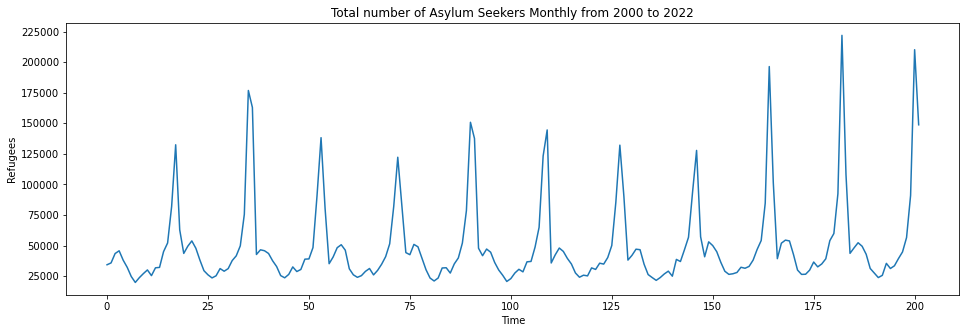

In [455]:
plt.plot(ref.index, ref["Value"])
plt.title("Total number of Asylum Seekers Monthly from 2000 to 2022")
plt.xlabel("Time")
plt.ylabel("Refugees")
plt.show()

In [456]:
def project_oil(x):
    return 5.5 * x ** 0.75 + 112

In [465]:
project_oil(9)

140.57883832488648

In [487]:
fao

,Food Price Index,Year,Month
1,64.1,1990,1
2,64.5,1990,2
3,63.8,1990,3
4,65.8,1990,4
5,64.4,1990,5
...,...,...,...
384,133.7,2021,12
385,135.6,2022,1
386,141.1,2022,2
387,159.7,2022,3
